# CONCRETE STRENGTH PREDICTION USING ANN

- Regression is a type of supervised machine learning algorithm used to predict a continuous label. The goal is to produce a model that represents the 'best fit' to some observed data, according to an evaluation criterion.


- In this Analysis, you will be predicting the strength of concrete using the given eight features that describe the components used in the mixture.These features are believed to be related to the final compressive strength which include the amount of cement in Kilograms per cubic meter, Blast.Furnace.Slag, Fly.Ash, water,superplasticizer, coarse aggregate, fine aggregate and aging period measured in days.

## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import  callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline

# for Interactive Shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Import Dataset

In [3]:
df = pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


The dataset contains 1030 observations accross 8 input variables and an output variable. The variable name, variable type, the measurement unit and a brief description is provided.

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### There are 8 independent variables in training set:

- Cement: Total amount of cement it that particular sample.
- Blast Furnace Slag:  Blast furnace slag (BFS) is a byproduct of the iron and steel manufacturing process. BFS is used to improve the strength and durability of concrete.
- FlyAsh :  It improves the strength and durability of the concrete.
- Water: The optimal water content for cement is usually between 15-20% of the total cement weight. Too little water will result in a dry, crumbly mix, while too much water can lead to a weak, porous concrete.
- Superplasticizer:  Superplasticizers, also known as plasticizers or high range water reducers, are a type of admixture that is used to increase the workability of concrete without increasing the water-cement ratio.
- CoarseAggregatet:  Coarse aggregate is used for a variety of purposes, including providing strength, improving the workability of concrete, and reducing the amount of cement needed in a concrete mix.
- FineAggregate:  Similar as CoarseAggregateComponent but smaller in size.
- Age:  Age in days is a term used to describe the amount of time that has passed since the cement was mixed with water. Concrete gains strength over time and its properties can change significantly depending on the age. The most commonly used ages for testing concrete strength are 7, 14, 21, and 28 days.

### Target varibale:

- Strength:  Strength of the cement.

## Exploratory Data Analysis

In [7]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [11]:
# Summary statistics
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


All predictors in the dataset are quantitative datatypes. Moreover, there are no missing values in the data. Lets analyse the probability distribution of the variables through a series of univariate density plots.

In [13]:
#  Getting known with the kind of distrubutions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

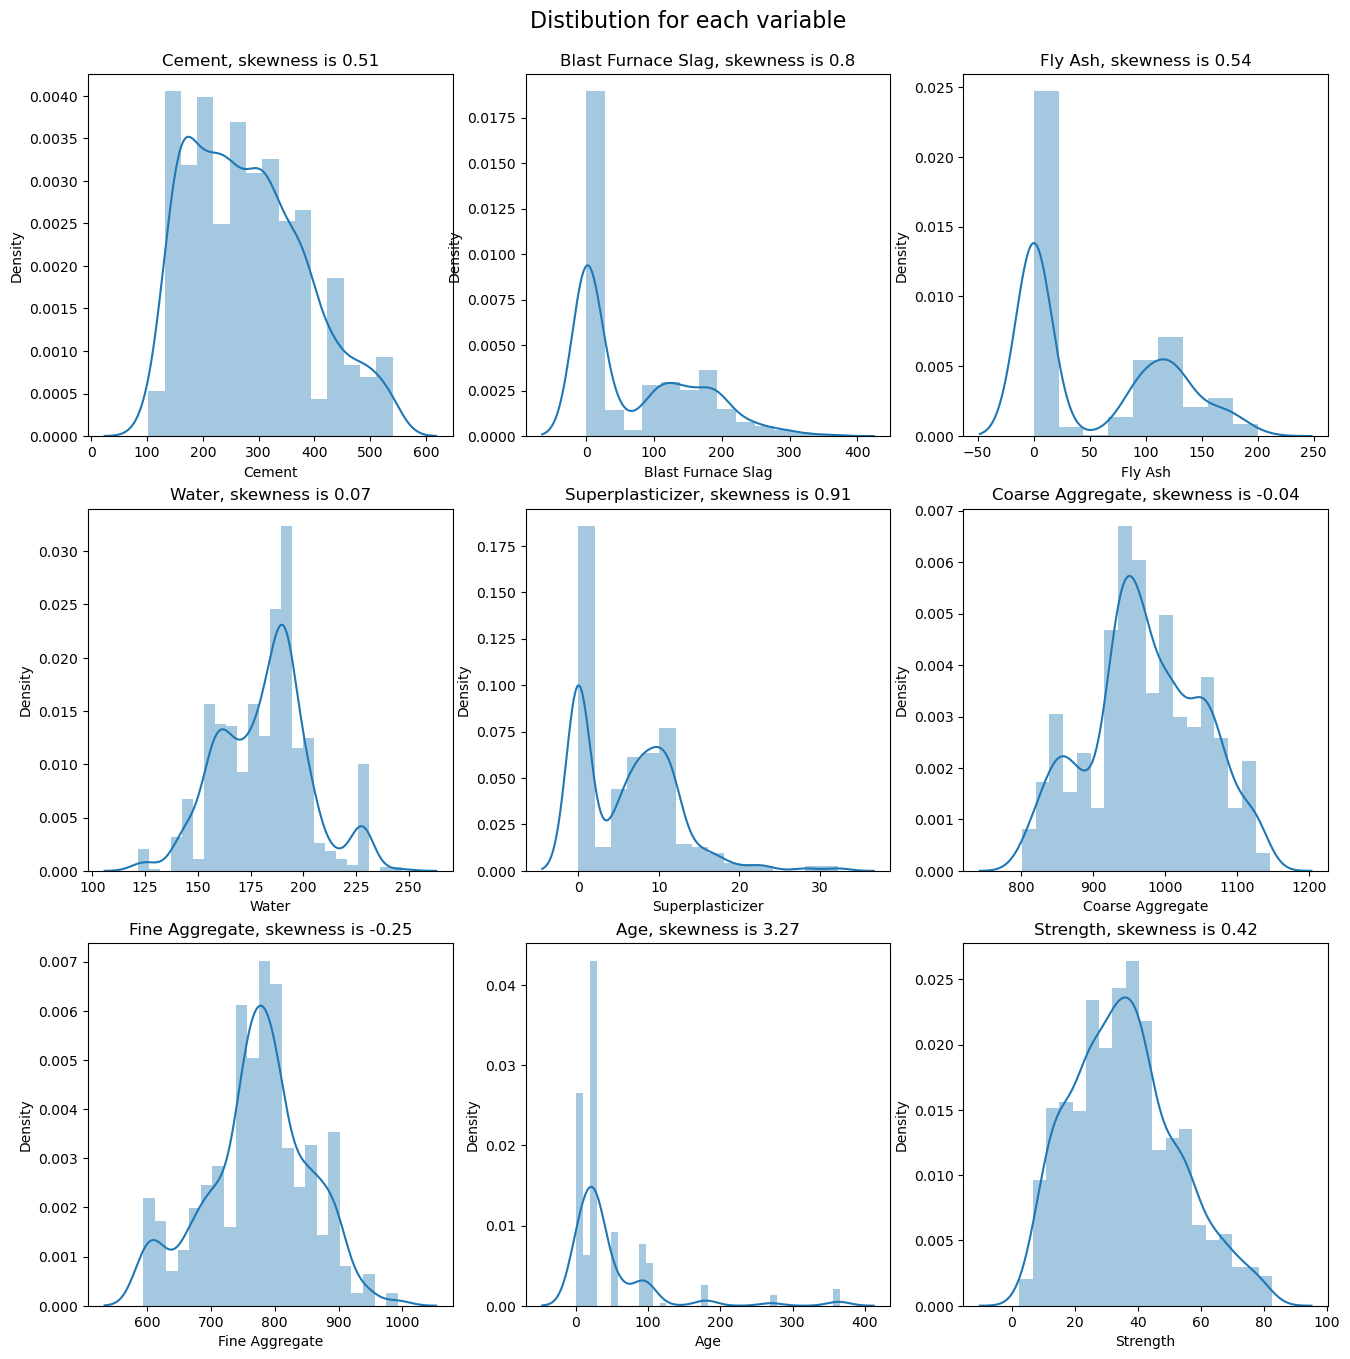

In [15]:
dist_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Distibution for each variable')

Most variables do not follow normal distribution. It would be interesting to convert the response variable into a category of 'optimal' and 'suboptimal' in order to detect any interesting patterns between the predictors and the target variable. I'll conisder the observations at the 75th percentile or greater to be good.

In [17]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)

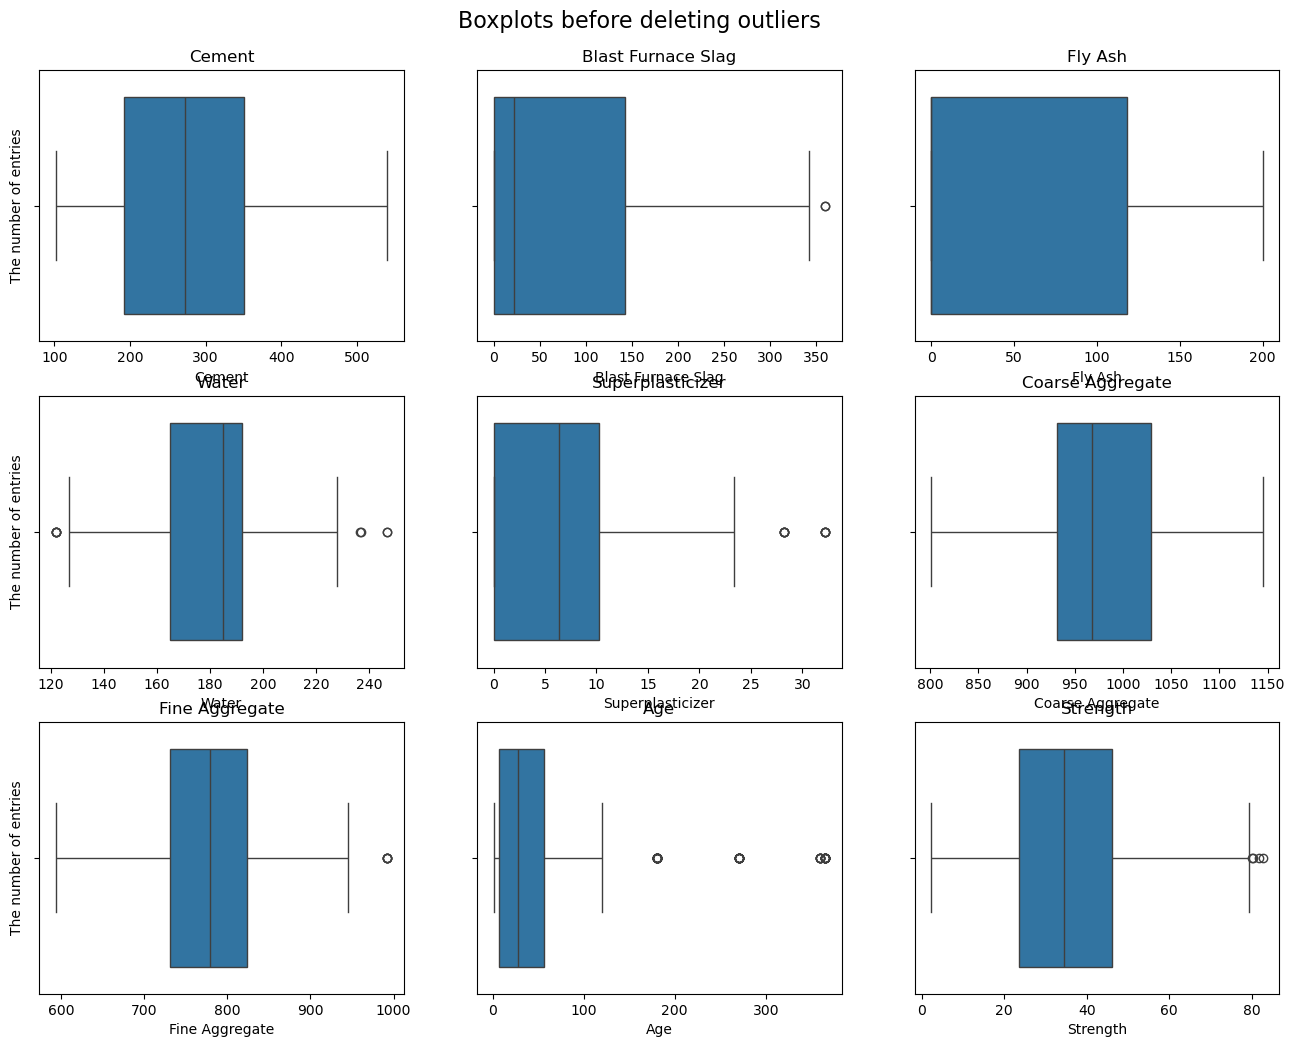

In [19]:

boxplots_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle='Boxplots before deleting outliers')

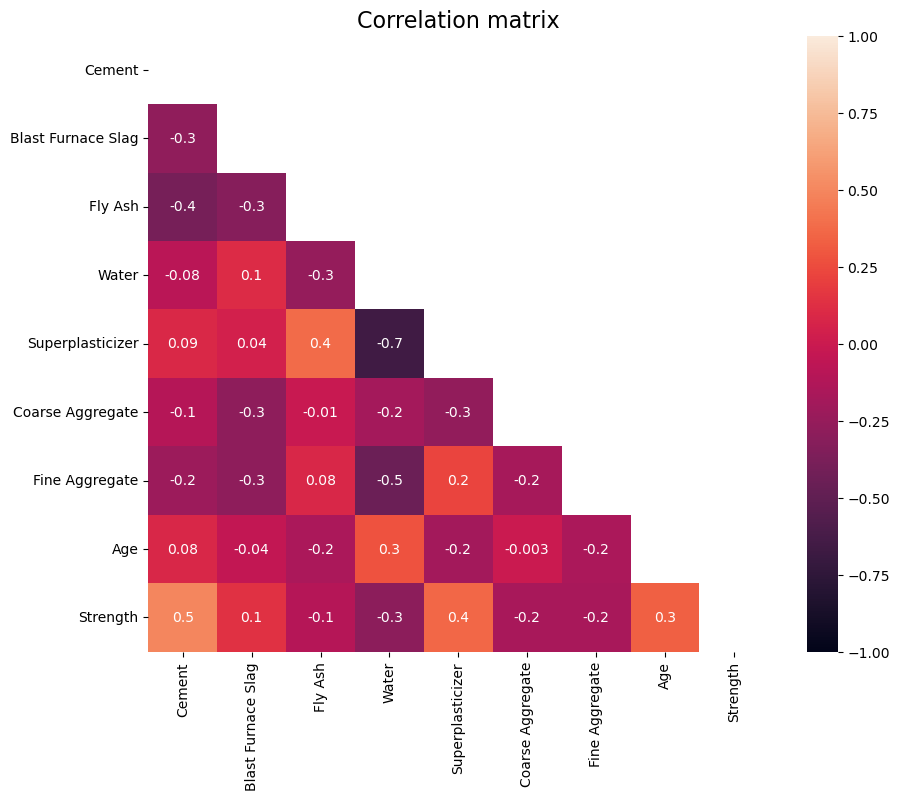

In [25]:
# calculating the correlation matrix
corr = df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0,
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix', size=16)
plt.show()

The pearsons correlation assumes normality, linearity, homoscedasticity and no outliers. These assumptions are violated for most variables. This may be a potential reason as to why pearsons correlation won't detect nuances between predictors and the independent variables properly. Additionally, the relationship between inputs does seem to be largely non-linear. Nonetheless, cement, water, and superplastisizer do seem to be moderately correlated with strength.

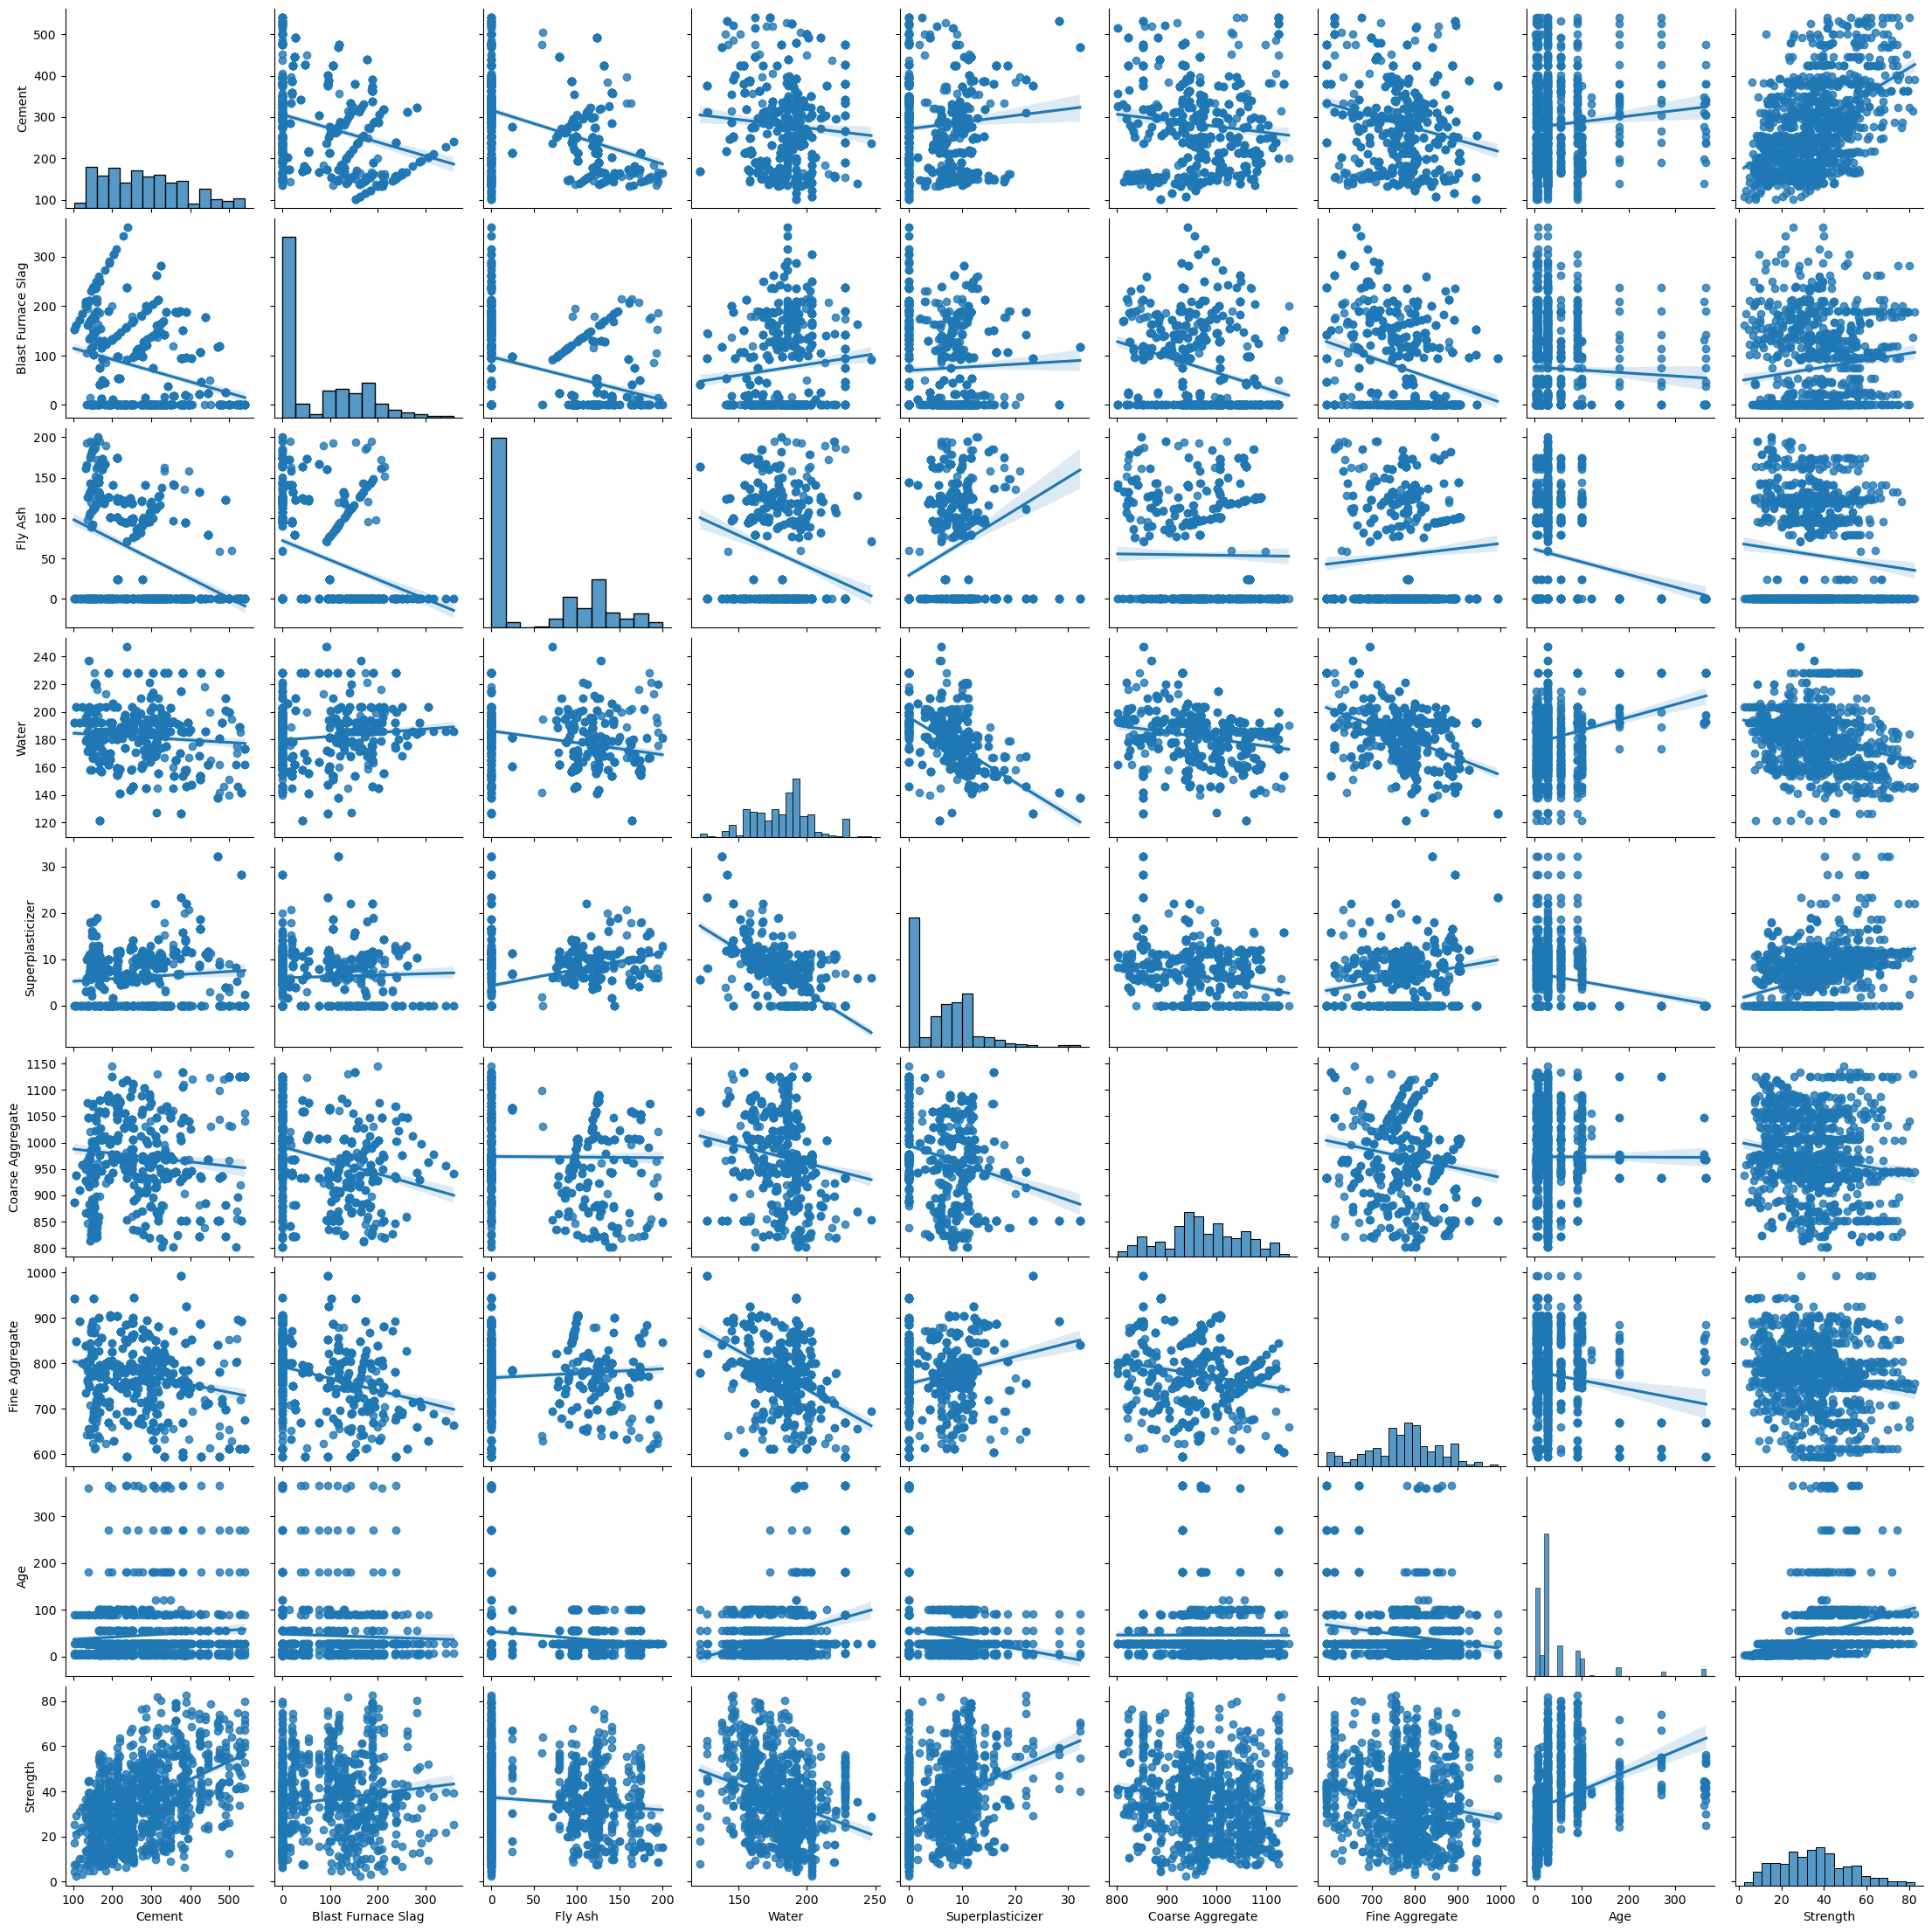

In [31]:
sns.pairplot(data=df,kind="reg")
plt.show()

## Data Preprocessing

Some machine learning algorithms require features to be scaled through normalization or standardization. I will now split the dataset into training and testing and then perform standardization. This will tansform the features such that their mean and standard deviation will become 0 and 1.

In [33]:

X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [35]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 43)

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

## Model Building using ANN

In [39]:
# Building the ANN
model1 = Sequential()

# Adding the input layer and the first hidden layer
model1.add(Dense(units = 100,
                     activation = 'relu',
                     input_shape = [X_train.shape[1]]))


# Adding the second hidden layer
model1.add(Dense(units = 60, activation = 'relu'))

# Adding the Third hidden layer
model1.add(Dense(units = 80, activation = 'relu'))

# Adding the fourth hidden layer
model1.add(Dense(units = 90, activation = 'relu'))

# Adding the fifth hidden layer
model1.add(Dense(units = 100, activation = 'relu'))

# Adding the output layer
model1.add(Dense(units = 1, activation = 'sigmoid'))

In [41]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 90)                  │           7,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,331 (110.67 KB)

 Trainable params: 28,331 (110.67 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compiling the ANN
model1.compile(loss = 'mean_squared_error')

# Fitting the ANN to the Training set
new1 = model1.fit(X_train,y_train,
                          batch_size=62 ,
                          epochs=100 ,
                          validation_split=0.1,
                          verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1455.3479 - val_loss: 1526.5795
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1417.8920 - val_loss: 1526.5795
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1428.0199 - val_loss: 1526.5795
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1409.0338 - val_loss: 1526.5795
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1393.9979 - val_loss: 1526.5795
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1444.3468 - val_loss: 1526.5795
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1417.5295 - val_loss: 1526.5795
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1384.8463 - val_loss: 1526.5795
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1373.0455 - val_loss: 1526.5795
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1514.2241 - val_loss: 1526.5795
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1457.2926 - val_loss: 1526.5

           loss     val_loss
0   1439.286377  1526.579468
1   1439.286377  1526.579468
2   1439.286377  1526.579468
3   1439.286377  1526.579468
4   1439.286377  1526.579468
..          ...          ...
95  1439.286255  1526.579468
96  1439.286133  1526.579468
97  1439.286133  1526.579468
98  1439.286133  1526.579468
99  1439.286377  1526.579468

[100 rows x 2 columns]


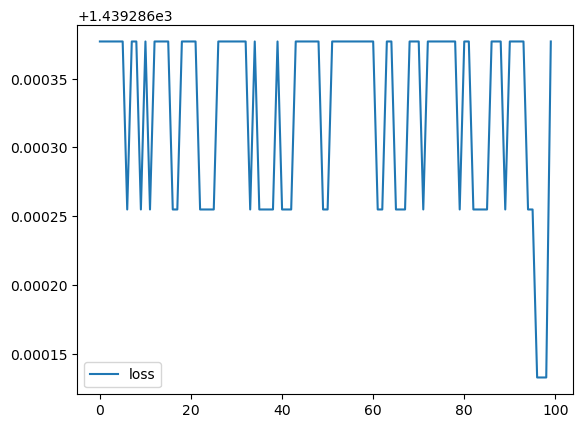

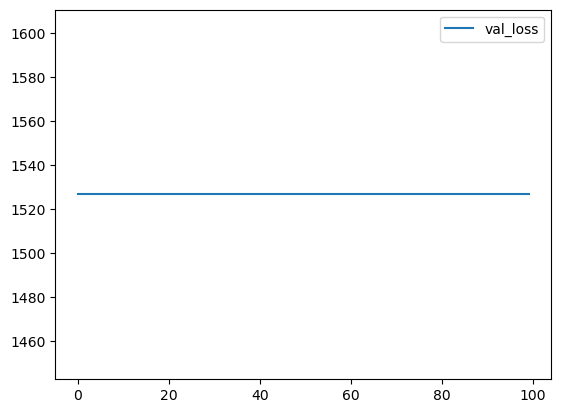

In [65]:
history = pd.DataFrame(new1.history)
print(history)
history.loc[:, ['loss']].plot();
history.loc[:, ['val_loss']].plot();

In [67]:
y_pred = model1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-4.9581087889911535

In [83]:
y1= np.array(sorted(y_pred)+MAE).ravel()
y1

array([38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 38.202717, 38.202717,
       38.202717, 38.202717, 38.202717, 38.202717, 

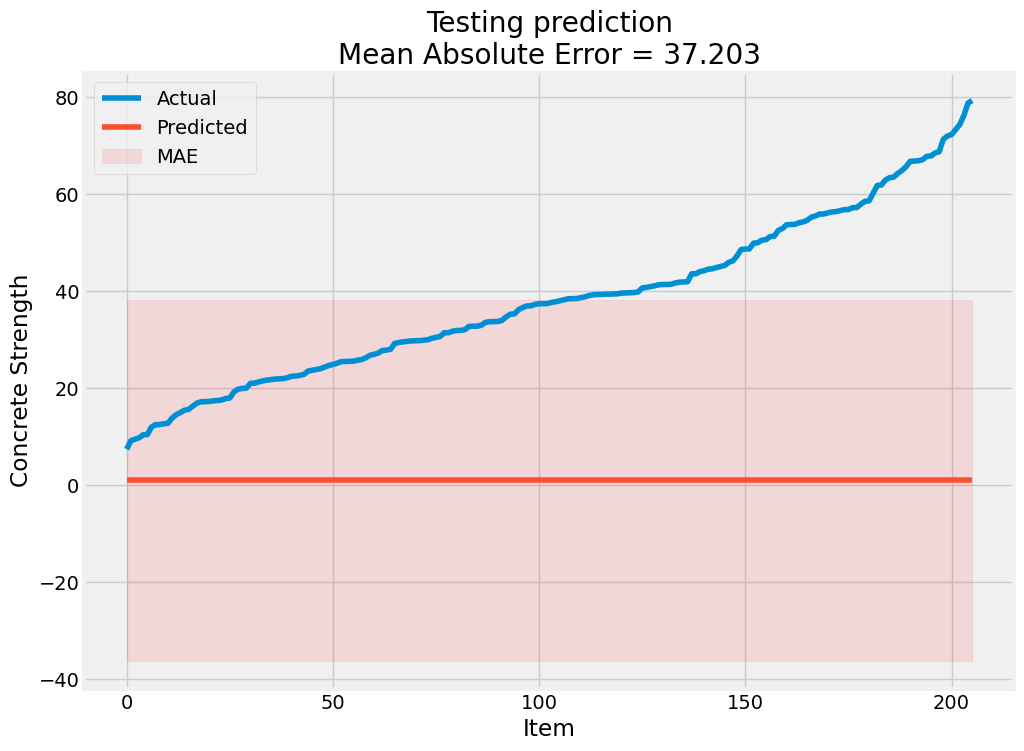

In [93]:
MAE = mae(y_test,y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
    plt.fill_between(x=np.arange(0,len(y_pred)),y1=np.array(sorted(y_pred)+MAE).ravel(),y2=(sorted(y_pred)-MAE).ravel(),alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()

This model is not performing better so we need to fine tune this model for better accuracy

## Model Tuning

## Improving with different architecture

In [95]:
model2 = keras.Sequential([
    Dense(40 , activation = 'relu' , input_shape = [X_train.shape[1]]),
    Dense(50 , activation = 'relu'),
    Dense(60 , activation = 'relu'),
    Dense(1 , activation = 'linear')
])

In [97]:
# summary of the model
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 40)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,531 (21.61 KB)

 Trainable params: 5,531 (21.61 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model2.compile(loss = 'mean_squared_error'  )

In [101]:
history = model2.fit(X_train,y_train,batch_size=62 , epochs=100 , validation_split=.1,verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1468.7257 - val_loss: 1478.5181
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1315.4664 - val_loss: 1262.2069
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1105.4926 - val_loss: 956.9394
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 818.8746 - val_loss: 620.8024
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 514.5971 - val_loss: 387.3805
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 333.8503 - val_loss: 283.8771
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227.5222 - val_loss: 243.8282
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 201.9127 - val_loss: 226.3353
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 200.0993 - val_loss: 215.7956
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 175.7659 - val_loss: 208.3777
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170.3723 - val_loss: 202.3239
Epoch 12/100


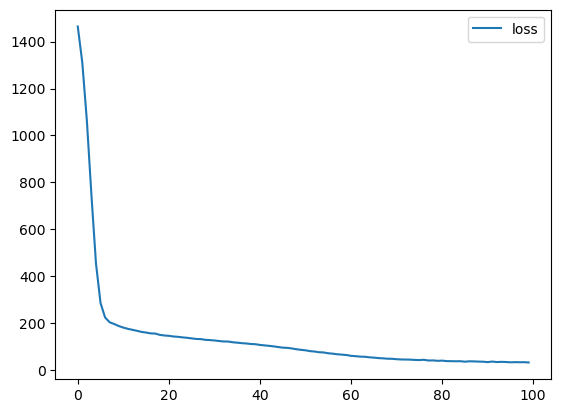

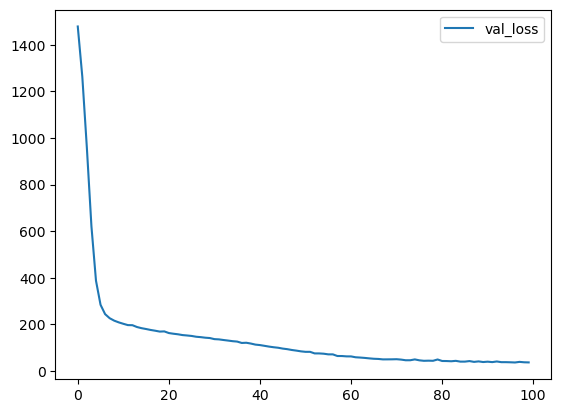

In [103]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();
history_df.loc[:, ['val_loss']].plot();

## Prediction on Unseen Data

In [105]:
y_pred = model2.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


## Model Evaluation

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8182663849971474

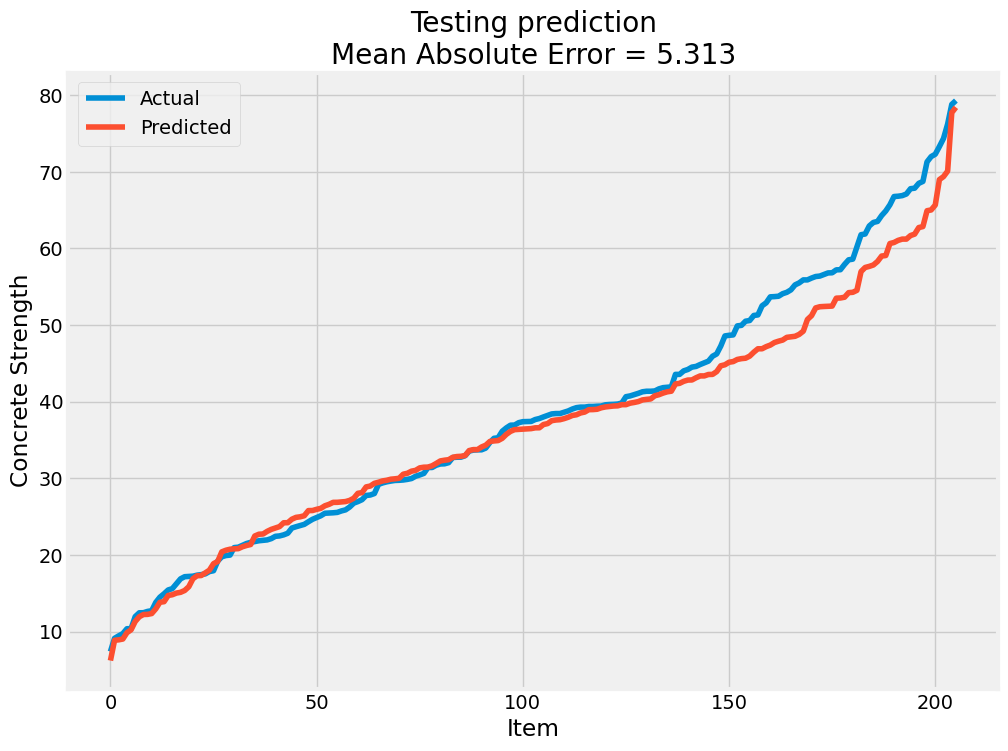

In [109]:
MAE = mae(y_test,y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

    plt.plot(sorted(y_test), label='Actual')
    plt.plot(sorted(y_pred), label='Predicted')
#     plt.fill_between(x=np.arange(0,len(y_pred)),
#                      y1=np.array(sorted(y_pred)+MAE),
#                      y2=sorted(y_pred)-MAE,
#                      alpha=0.1, color='r', label='MAE')

    plt.title('Testing prediction\nMean Absolute Error = {:.3f}'.format(MAE))
    plt.ylabel('Concrete Strength')
    plt.xlabel('Item')
    plt.legend()
plt.show()